In [1]:
from src.datasets import CBISDataset, InbreastDataset
from src.pipeline.breast import BreastImageProcessingPipeline
from torch.utils.data import DataLoader
from src.operations.transform import crop_to_roi, resize_square
from src.operations.normalize import truncate_normalization, normalize_int8
import matplotlib.pyplot as plt

pipeline = BreastImageProcessingPipeline()
train = InbreastDataset('/mnt/d/datasets/INbreast', pipeline, True)
test = InbreastDataset('/mnt/d/datasets/INbreast', pipeline, False)

In [2]:
train_loader = DataLoader(train, 8, shuffle=False, num_workers=8)
data = next(iter(train_loader))

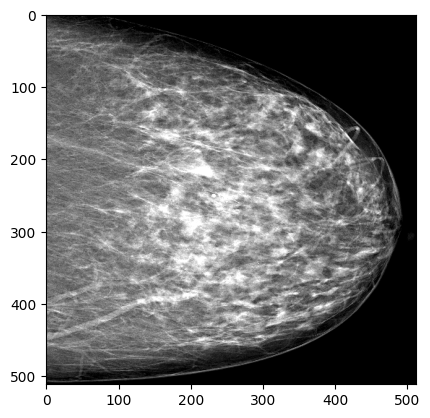

In [3]:
plt.imshow(data[0][5], cmap='gray')
plt.show()

In [17]:
import cv2
import numpy as np

original_image = data[0][6].cpu().numpy()
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(original_image)

In [18]:
def calculate_psnr(original, processed):
    if original.shape != processed.shape:
        raise ValueError("Input images must have the same dimensions")
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel_value = 255.0
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    return psnr

In [19]:
calculate_psnr(original_image, image_clahe)

29.946777346289842

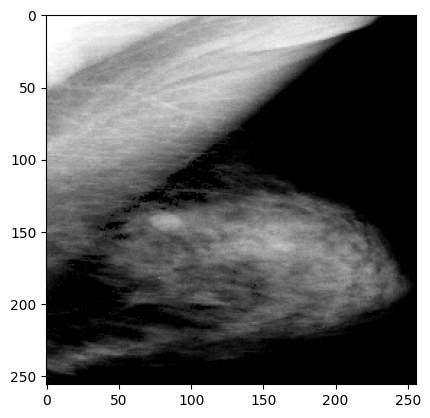

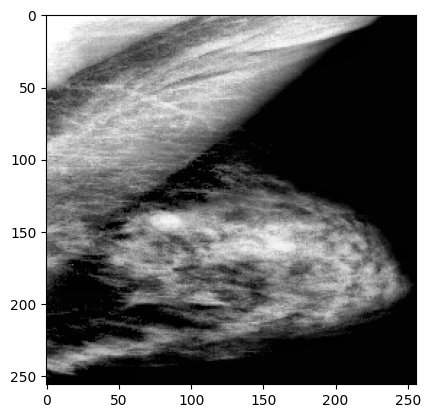

In [ ]:
plt.imshow(original_image, cmap='grey')
plt.show()

plt.imshow(image_clahe, cmap='grey')
plt.show()

In [1]:
from src.augmentations.classwise import ClasswiseAugmentor

augmentor = ClasswiseAugmentor('./data/cbis/lesions/train', 2, ['mass'], 'photometric')
augmentor.run()

/home/nvidia/.conda/envs/norse/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Augmenting ./data/cbis/lesions/train/mass: 100%|██████████| 212/212 [00:01<00:00, 200.76it/s]
